# Homework 2


This week's homework will be done entirely in a jupyter notebook. Please submit your homework to Canvas as a single .ipynb file. Note that this assignment should be done in pairs.

Please indicate both team members' names below.

- Partner 1 name & number of hours spent on assignment: Jordan Carlin
- Partner 2 name & number of hours spent on assignment: Korin Aldam-Tajima


In [1]:
%matplotlib inline

In [2]:
# here are some useful packages that you may need
import numpy as np
from scipy.signal import stft, resample_poly
from scipy.signal.windows import hann
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import IPython.display as ipd

### Problem 1: Re-implementation


#### Part a: myDFT


In the myDFT function below, you will implement the DFT. In this function, you should do the following:

- fill in the coefficients of A row by row using vectorized code. You should not have a nested for loop.
- perform a matrix multiplication to calculate the DFT. You may use [numpy.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) or the shorthand notation `@` to do matrix multiplication.
- return the result as a 1-D numpy array

Be careful about 1-D vs 2-D numpy arrays (e.g. a length-8 vector versus a 1x8 matrix). You can remove vacuous dimensions with [numpy.squeeze](https://docs.scipy.org/doc/numpy/reference/generated/numpy.squeeze.html).


In [3]:
def myDFT(x):
    """
    Calculates the DFT of the input signal x.
    """
    N = len(x)
    A = np.zeros((N, N), dtype=np.complex128)

    ### START CODE HERE ###
    for k in range(N):
        A[k, :] = np.exp((-1j * 2 * np.pi * k * np.arange(N)) / N)

    X = x @ A
    ### END CODE HERE

    return X

Insert code below to:

- create a vector of 32 randomly generated numbers using [numpy.random.randn](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html)
- calculate the DFT using your myDFT function
- calculate the DFT using the [numpy.fft.fft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft) function
- verify that the outputs match using [numpy.allclose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html)


In [4]:
### START CODE HERE ###
test_data = np.random.randn(32)

my_result = myDFT(test_data)

fft_result = np.fft.fft(test_data)

if np.allclose(my_result, fft_result):
    print("The results match.")
else:
    print("The results do not match.")

### END CODE HERE ###

The results match.


#### Part b: mySTFT


In the mySTFT function below, you will implement the STFT. In the function, you should do the following:

- fill in matrix S column by column. You may use [scipy.signal.hann](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.hann.html) for the window function, and [numpy.fft.fft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html) for the FFT.
- calculate f and t
- discard the upper half of f and S, so that only the first `N/2 + 1` frequencies are returned.


In [5]:
def mySTFT(x, fs, N, noverlap):
    """
    Calculates the STFT of an input signal.

    Arguments
    ---------
    x: the input signal
    fs: the sampling rate (Hz)
    N: the FFT size
    noverlap: the number of samples that overlap between consecutive analysis windows

    Returns
    -------
    f: an array specifying the frequencies in Hz of the STFT bins
    t: an array specifying the time offsets of the analysis windows (center of window)
    S: the STFT matrix.  Only the lower N/2 + 1 frequency bins are returned.
    """
    hop = N - noverlap
    offsets = np.arange(0, len(x) - N + 1, hop)
    S = np.zeros((N, len(offsets)), dtype=np.complex128)

    ### START CODE HERE ###
    upper_bound = N
    for i, m in enumerate(offsets):
        S[:, i] = np.fft.fft(x[m : upper_bound + m] * hann(upper_bound))

    f = np.arange(N // 2 + 1) * fs / N
    t = offsets / fs
    S = S[0 : N // 2 + 1,]

    ### END CODE HERE ###

    return f, t, S

Use your implementation to compute the STFT for a 4 second long, 8kHz audio signal containing a pure sinusoid with frequency 440 Hz. Use a window size of 512 and a hop size of 128. Verify that your `t` and `f` variables match the outputs from [scipy.signal.stft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html).


In [6]:
(fs, winsize, hop) = (8000, 512, 128)
(f, dur) = (440, 4)
a = np.cos(2 * np.pi * f / fs * np.arange(dur * fs))

### START CODE HERE ###

# My version
f1, t1, S1 = mySTFT(a, fs, winsize, winsize - hop)

# Scipy version version
f2, t2, S2 = stft(
    a, fs=fs, window=hann(winsize, sym=False), nperseg=winsize, noverlap=winsize - hop
)

if np.allclose(t1, t2[0:247]):  # TODO: Ask in office hours why the lengths mismatch????
    print("The `t` results match.")
else:
    print("The `t` results do not match.")

if np.allclose(f1, f2):
    print("The `f` results match.")
else:
    print("The `f` results do not match.")

### END CODE HERE ###

The `t` results match.
The `f` results match.


Due to various implementation differences, your STFT matrix may not exactly match [scipy.signal.stft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html), but the plotted images should look the same. Use the plotting code below to display the two spectrograms as images, and verify that they look the same.


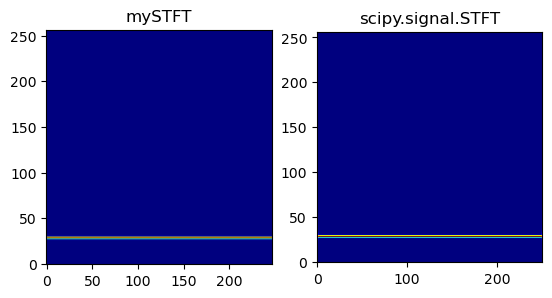

In [7]:
plt.subplot(121)
plt.imshow(np.abs(S1), origin="lower", cmap="jet")
plt.title("mySTFT")
plt.subplot(122)
plt.imshow(np.abs(S2), origin="lower", cmap="jet")
plt.title("scipy.signal.STFT")
plt.show()

### Problem 2: DFT & Sound (part 1)


In this section, you should do the following:

- Record yourself singing “ah” at four different pitches: C4, E4, G4, and C5. Hold each
  note for at least 3 seconds. You can use [Audacity](https://www.audacityteam.org/) to record on your laptop.
- Read in the audio file using [scipy.io.wavfile.read](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html) and downsample to 22050 Hz using [scipy.signal.resample_poly](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.resample_poly.html).
- Verify that you have loaded the audio correctly by embedding the audio in the notebook and listening to it. You can use [IPython.display.Audio](https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html).
- Extract 4 different segments of audio corresponding to the four notes. Each segment should be exactly 3 seconds long.
- Compute the DFT for the four segments, and compare the magnitude and phase plots. Include well-designed plots that are easy to interpret (zoomed in on interesting part, axes labeled with intuitive units). What are the analog frequencies that correspond to spikes in the DFT magnitude plots? What is the relationship of the spike locations to each other? Comment on the differences and similarities between the plots.


Use as many code and Markdown cells as needed below to complete these tasks. You should define appropriate functions (e.g. for extracting segments or plotting the DFT) where appropriate, rather than copying and pasting code multiple times. Please include your explanations in Markdown cells.


In [8]:
### INSERT CODE AND MARKDOWN CELLS BELOW ###


def load_audio(filename: str, target_sample_rate: int) -> np.ndarray:
    """Load an audio file and resample it to the target_sample_rate"""
    sr_orig, x_orig = read(filename)
    return resample_poly(np.array(x_orig), target_sample_rate, sr_orig)

In [9]:
# Load and play audio
sr = 22050
x0 = load_audio("4notes-as-long-as-possible.wav", sr)
ipd.Audio(x0, rate=sr)

In [10]:
def extract_single_note(x, fs, search_start) -> tuple[np.ndarray, int]:
    note_length = 3 * fs

    # Find beginning of note based on when the signal is at least half the max
    threshold = 0.2 * np.max(np.abs(x))
    min_threshold = 0.002 * np.max(np.abs(x))
    note_start = search_start
    for i, samp in enumerate(x[search_start:]):
        if np.abs(samp) >= threshold:
            note_start = i + search_start
            break

    note_end = note_start + note_length
    while note_end <= len(x) and np.abs(x[note_end]) > min_threshold:
        note_end += 5

    # print(f"{note_start=}, {note_end=}")

    return (x[note_start : note_start + note_length], note_end)


def extract_notes(x, fs) -> list[np.ndarray]:
    """Extract 3-second snippets of individual notes from the audio signal x.

    Args:
        x: input audio signal
        fs: sample rate
    """
    notes = []

    # Find beginning of note based on when the signal is at least half the max
    search_start = 0
    while True:
        note, note_end = extract_single_note(x, fs, search_start)
        notes.append(note)
        search_start = note_end + 1 * fs
        if search_start >= len(x):
            break

    return notes


In [11]:
notes = extract_notes(x0, sr)

print(len(notes))
# ipd.Audio(notes[0], rate=sr)

9


In [12]:
def plot_fft(note_fft: np.ndarray) -> None:
    plt.plot(np.abs(note_fft))
    plt.show()
    plt.plot(np.angle(note_fft))
    plt.show()

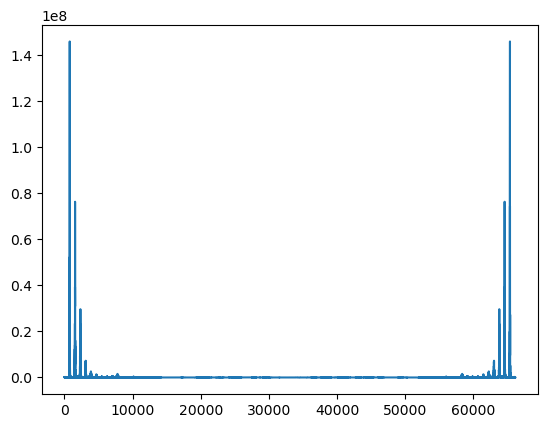

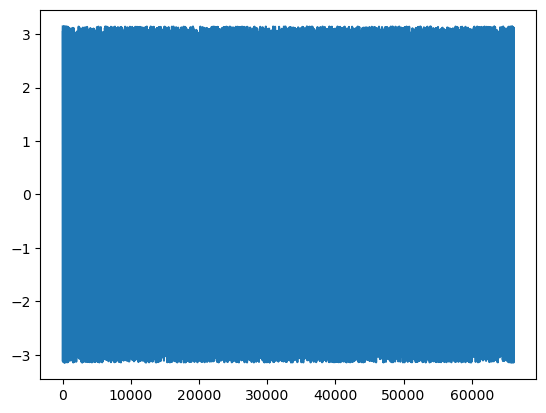

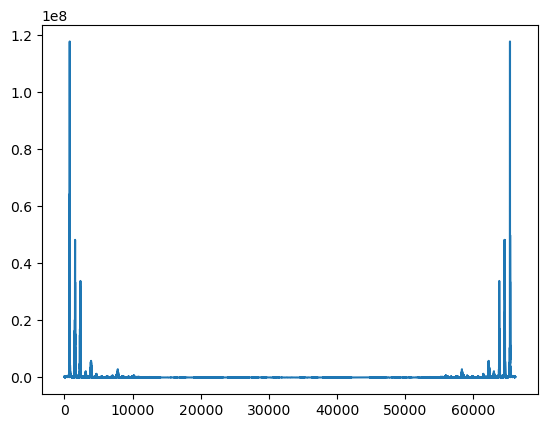

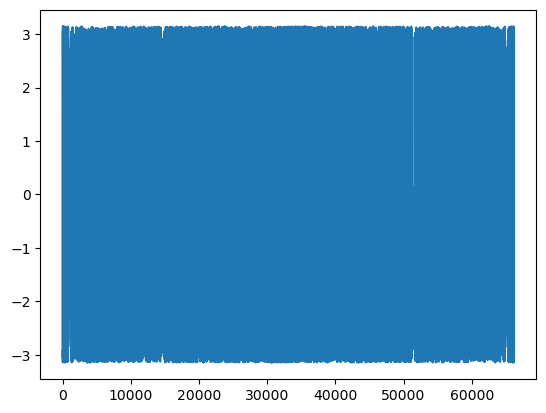

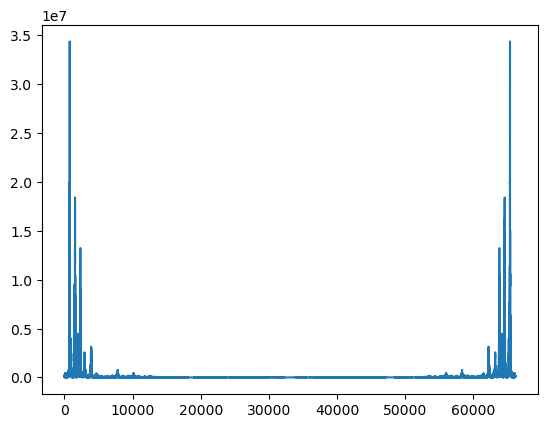

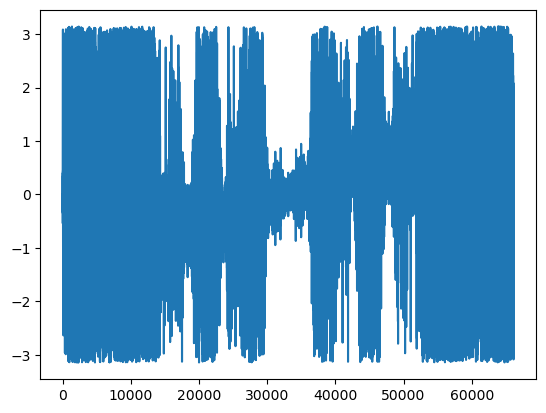

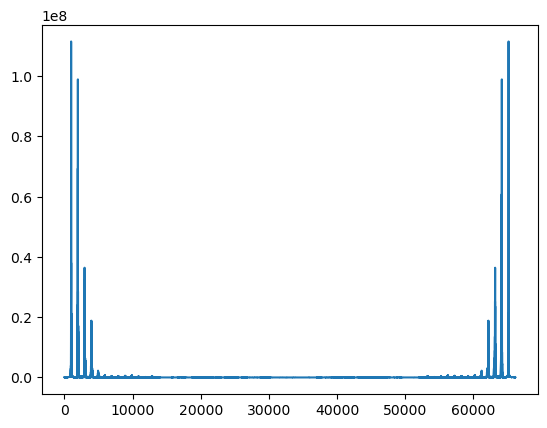

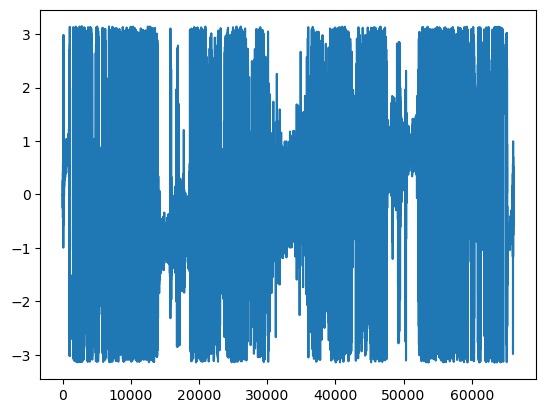

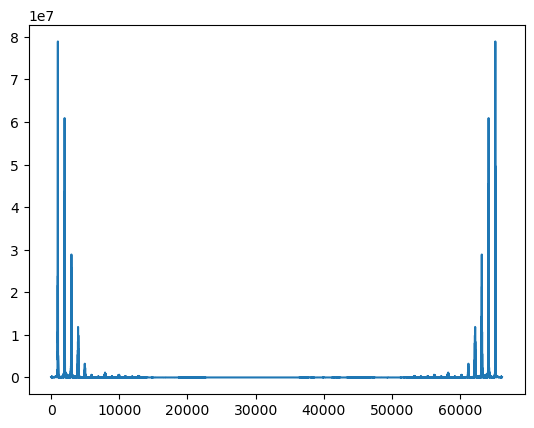

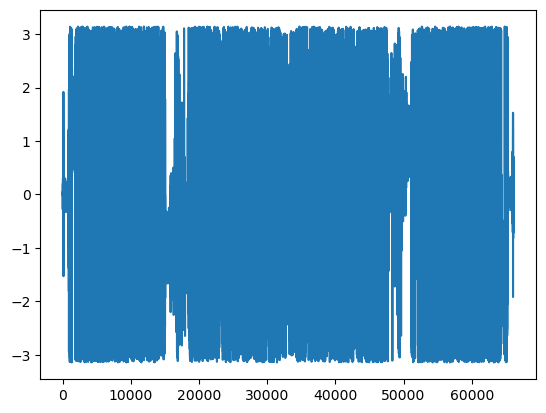

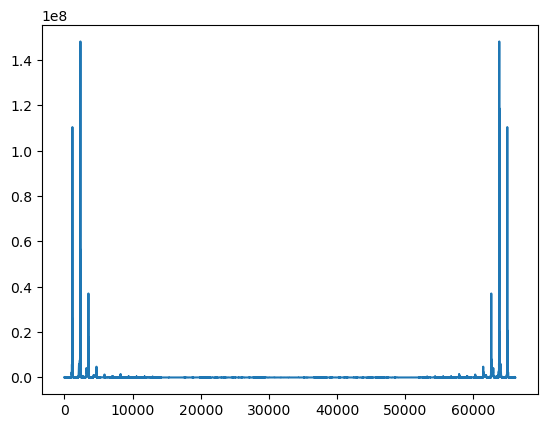

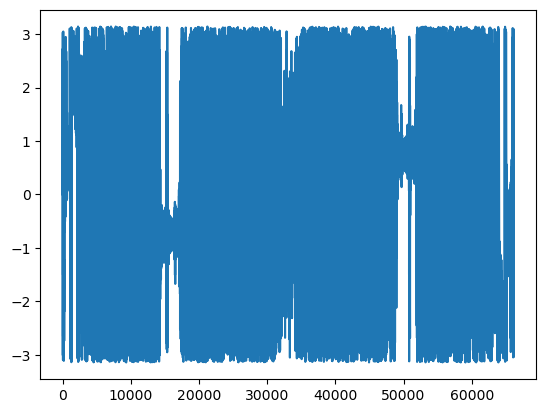

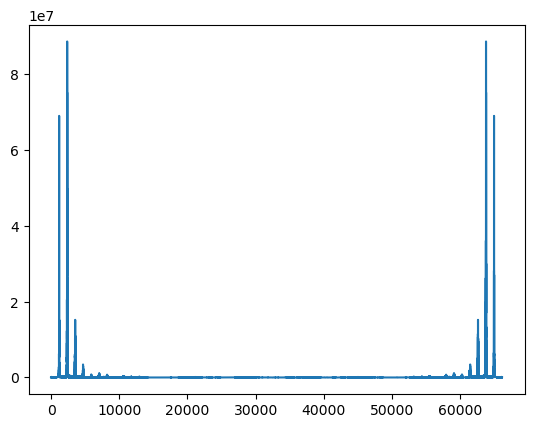

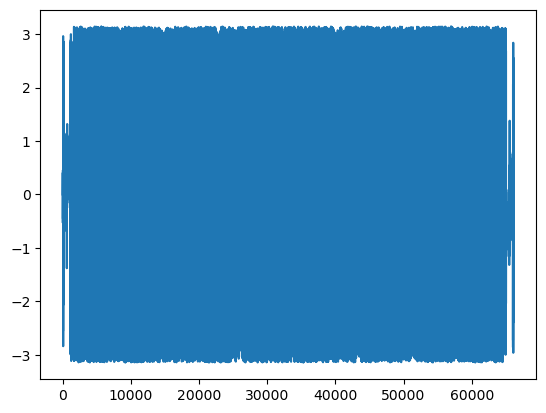

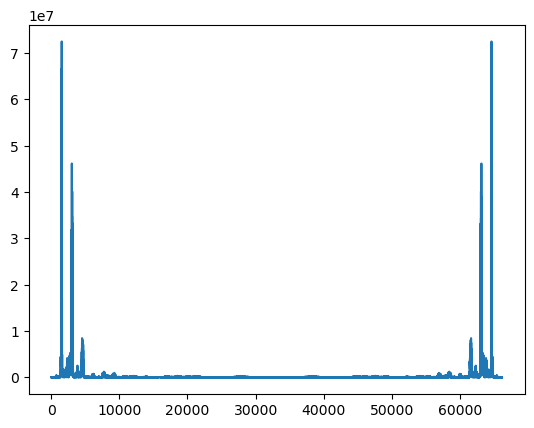

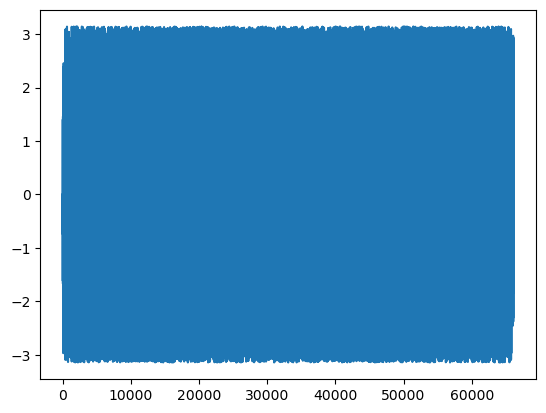

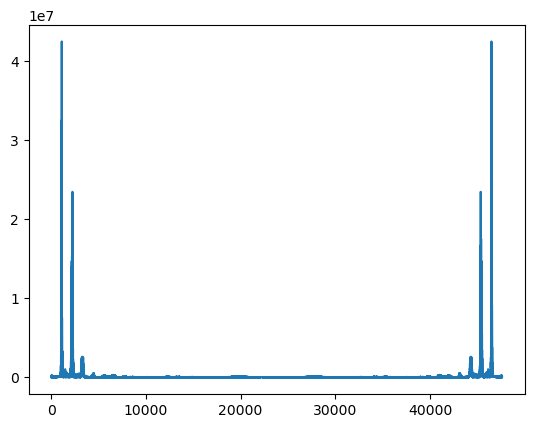

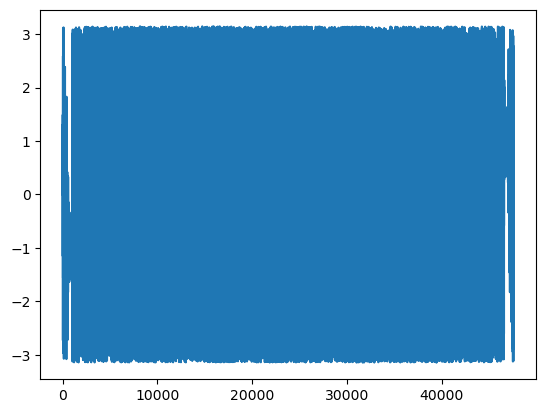

In [13]:
for note in notes:
    note_fft = np.fft.fft(note)
    plot_fft(note_fft)

### Problem 3: DFT & Sound (part 2)


In this section, you should do the following:

- Record yourself singing four different sounds: “ah”, “ee”, and “oo”. Sing all three at the same pitch. Hold each sound for at least 3 seconds.
- Read in the audio file and downsample to 22050 Hz.
- Extract 3 different segments of audio corresponding to the three sounds. Each segment should be exactly 3 seconds long.
- Compute the DFT for the three segments, and compare the magnitude and phase plots. Include well-designed plots that are easy to interpret. How are the plots different? Similar?


Use as many code and Markdown cells as needed below to complete these tasks. Be sure to reuse your functions from before!


In [ ]:
### INSERT CODE AND MARKDOWN CELLS BELOW ###
# Load and play audio
sr = 22050
x1 = load_audio("aaeeoo.wav", sr)
ipd.Audio(x1, rate=sr)

In [ ]:
notes = extract_notes(x1, sr)

print(len(notes))
ipd.Audio(notes[1], rate=sr)

### Problem 4: STFT & Sound


In this section, you should do the following:

- Create an 22050 Hz audio signal containing a synthetic scale with eight notes: C4, D4, E4, F4, G4, A4, B4, C5. Each note should be a pure sinusoid and last exactly 1 second.
- Calculate the STFT. Make sure to adjust the parameters of the STFT for useful display, and include a magnitude plot of the interesting part of the matrix.
- For each of the three STFT parameters (window size, hop size, sampling rate), describe the pros & cons of increasing or decreasing the value. When would you want to increase or decrease the parameter value and why?
- Given a complete STFT (that includes the complex conjugate half) of the audio signal in (a), describe which coefficients in the matrix will have large magnitude. Your answer should contain algebraic expressions in terms in of $N$, $\Delta_{samples}$ , and $𝑓_s$.


Use as many code and Markdown cells as needed below to complete these tasks. Be sure to reuse your functions from before!


In [ ]:
### INSERT CODE AND MARKDOWN CELLS BELOW ###
# Load and play audio
sr = 22050
x2 = load_audio("scale.wav", sr)
ipd.Audio(x2, rate=sr)

In [ ]:
# STFT
winsize = 512
hop = 128
f, t, S = stft(
    a, fs=sr, window=hann(winsize, sym=False), nperseg=winsize, noverlap=winsize - hop
)

plt.imshow(np.abs(S), origin="lower", cmap="jet")
plt.title("Scale STFT")
plt.show()

### Problem 5: Exploring Sound


Similar to problems 2 and 3, pick one question of interest related to sound and conduct an investigation. Your exploration should contain three components:

- A clear question. Your investigation should have a clear question. For example, in problem 2, you investigated the question “How does the pitch of a note affect the spectra?”
- Data collection & analysis. You should record data and conduct data analysis using the DFT and STFT as tools.
- Observation & conclusion. Based on your data analysis, you should make a list of observations and come up with an answer to your question.


In [ ]:
### INSERT CODE AND MARKDOWN CELLS BELOW ###
